# Scikit-Learn

Lab Submitted By
- OLUTOLA Oloruntobi Paul
- KAUR Sukhjot
- DORNAT Julie

## Exploratory analysis

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import (
    datasets,
    linear_model,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc

In [131]:
%config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 1.6.x

1.7.2


---

### Classification (digits)

Let's look at the classification model performance in terms of precision and recall.

#### Data loading

https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset

In [132]:
digits = datasets.load_digits()

In [133]:
# Flatten the images
n_samples = len(digits.images)
print(digits.images.shape)

data = digits.images.reshape([n_samples, -1])

print(data.shape, digits.target.shape)

(1797, 8, 8)
(1797, 64) (1797,)


In [134]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

Randomly select the training and test dataset.

<span style="color:red">Implement your solution below</span>

In [135]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.25, random_state=21)

#### Train the models

Train the model using, e.g., the [Gaussian Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

<span style="color:red">Implement your solution below</span>

In [136]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#### Evaluate

Evaluate with the [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

Then give a more complete result, including precision, recall and f1-score with the method [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

<span style="color:red">Implement your solution below</span>

In [137]:
score = round(accuracy_score(y_test, y_pred), 2)
print(f"Score: {score}")

print("Classification report:")
print(" - Precision = number of correct prediction of the class / number of all prediction classified as belonging to this class.In other words, it's the proportion of all the model's classifications of the class that are actually belonging to this class.")
print(" - Recall/The true positive rate = number of correct classification of the class / number of all class items.")
print(" - F1 score = 2*precision*recall / (precision + recall). It's the harmonic mean of precision and recall.")
print(" - Accuracy = correct classifications / total classification. It's the proportion of all correct predictions for all classes.")
print(f"{classification_report(y_test, y_pred)}")
print("6 is the number of the highest precision. It means there are no false positives for this number. False negative are possible but it's not the \ncase here because recall is 1.")

Score: 0.83
Classification report:
 - Precision = number of correct prediction of the class / number of all prediction classified as belonging to this class.In other words, it's the proportion of all the model's classifications of the class that are actually belonging to this class.
 - Recall/The true positive rate = number of correct classification of the class / number of all class items.
 - F1 score = 2*precision*recall / (precision + recall). It's the harmonic mean of precision and recall.
 - Accuracy = correct classifications / total classification. It's the proportion of all correct predictions for all classes.
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.89      0.74      0.81        46
           2       0.89      0.62      0.73        39
           3       0.92      0.69      0.79        51
           4       0.89      0.83      0.86        41
           5       0.98      0.94      0.96       

#### Confusion matrix

Use the class [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
to display the confusion matrix.

Briefly comment on the results.

Note that the `.confusion_matrix` attribute of the created object allows to obtain the confusion matrix in the form of an array.

<span style="color:red">Implement your solution below</span>

In [138]:
matrix = confusion_matrix(y_test, y_pred)
print("The size of the confusion (squared) matrix correspond to the number of classes. The lines represent the true label and \nthe column is associated to the predicted label. In the ideal case, only the diagonal should be different to zero. \nIn our case, we can observe that the 8 digits is often confused with the two and three. The 6 has no confusion with the other classes. ")
print("To improve the performance of the model, we can consider increasing the training instances for the most confusing cases like the 8.")
matrix

The size of the confusion (squared) matrix correspond to the number of classes. The lines represent the true label and 
the column is associated to the predicted label. In the ideal case, only the diagonal should be different to zero. 
In our case, we can observe that the 8 digits is often confused with the two and three. The 6 has no confusion with the other classes. 
To improve the performance of the model, we can consider increasing the training instances for the most confusing cases like the 8.


array([[40,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  2,  4,  6],
       [ 0,  2, 24,  0,  0,  0,  0,  0, 13,  0],
       [ 0,  0,  1, 35,  0,  0,  0,  2, 12,  1],
       [ 1,  0,  1,  0, 34,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  1,  0, 49,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  1,  1,  1,  0,  1,  0,  2, 47,  0],
       [ 0,  1,  0,  1,  3,  0,  0,  4,  7, 20]])

#### Error visualization

Identify the most confusing cases.

Identify misclassified instances for the lowest f1-scoring cipher class and visualize them with the code below.

You may use the function [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to find the index of the concerned instances.

In [139]:
def plot_digit(idx, xs, ys=None, pred_ys=None):
    if ys is not None:
        print(f"Digit value:\t{ys[idx]}")
    if pred_ys is not None:
        print(f"Prediction:\t{pred_ys[idx]}")

    plt.figure(figsize=(3, 3))
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(
        xs[idx].reshape(8, -1), 
        cmap=plt.cm.gray_r, 
        interpolation="nearest")
    ax.set_title(f"True: {ys[idx]}, Pred: {pred_ys[idx]}")
    plt.show()

<span style="color:red">Implement your solution below</span>

In [140]:
y_pred

array([6, 1, 1, 7, 4, 5, 8, 5, 0, 1, 4, 8, 6, 9, 2, 3, 8, 8, 3, 2, 8, 8,
       3, 5, 7, 5, 5, 7, 0, 3, 2, 7, 8, 6, 5, 4, 3, 7, 4, 7, 3, 9, 0, 8,
       8, 8, 0, 8, 5, 5, 8, 7, 6, 8, 5, 5, 2, 9, 0, 4, 8, 8, 8, 2, 4, 5,
       5, 2, 2, 8, 5, 8, 2, 8, 3, 0, 7, 1, 5, 4, 0, 0, 4, 8, 9, 8, 5, 3,
       0, 3, 0, 2, 3, 8, 4, 3, 4, 6, 8, 4, 5, 1, 3, 7, 1, 8, 0, 1, 5, 4,
       5, 4, 4, 8, 3, 0, 7, 0, 8, 5, 2, 6, 7, 6, 6, 3, 0, 0, 7, 7, 0, 2,
       8, 3, 2, 7, 0, 1, 9, 2, 5, 5, 8, 3, 5, 2, 3, 8, 8, 4, 8, 7, 9, 5,
       7, 6, 8, 8, 6, 1, 1, 4, 8, 0, 7, 7, 8, 1, 8, 5, 0, 7, 4, 7, 6, 7,
       5, 1, 9, 6, 3, 0, 5, 7, 6, 7, 2, 8, 4, 0, 1, 4, 1, 6, 7, 9, 8, 5,
       9, 0, 7, 7, 5, 3, 9, 7, 4, 2, 9, 5, 0, 9, 8, 7, 7, 7, 0, 2, 9, 6,
       5, 7, 7, 4, 7, 1, 6, 1, 6, 8, 1, 8, 0, 4, 5, 8, 7, 1, 3, 5, 1, 7,
       8, 0, 0, 6, 0, 8, 5, 6, 7, 6, 8, 5, 1, 4, 3, 6, 1, 9, 8, 8, 7, 6,
       2, 5, 2, 7, 7, 9, 5, 0, 8, 8, 8, 6, 1, 7, 6, 8, 4, 3, 1, 8, 7, 0,
       4, 6, 7, 2, 8, 3, 8, 9, 7, 0, 7, 5, 6, 5, 4,

In [141]:
index = np.where(y_pred != y_test)
print("The confusing cases (for which prediction label is not equal to true label) of the test set:")
index

The confusing cases (for which prediction label is not equal to true label) of the test set:


(array([  3,   6,  11,  17,  21,  32,  40,  43,  44,  47,  53,  60,  61,
         71,  73,  82,  84,  86,  93, 101, 103, 113, 120, 128, 132, 135,
        137, 150, 154, 156, 157, 168, 195, 204, 205, 215, 217, 224, 230,
        231, 233, 235, 241, 255, 260, 267, 268, 269, 272, 273, 283, 288,
        313, 316, 318, 319, 324, 326, 331, 350, 355, 362, 366, 371, 372,
        380, 387, 403, 404, 408, 410, 420, 425, 430, 431, 432]),)

In [142]:
X_test.shape

(450, 64)

In [143]:
y_test.shape

(450,)

Most confused class: 9, F1-score: 0.63
Digit value:	9
Prediction:	8


<Figure size 300x300 with 0 Axes>

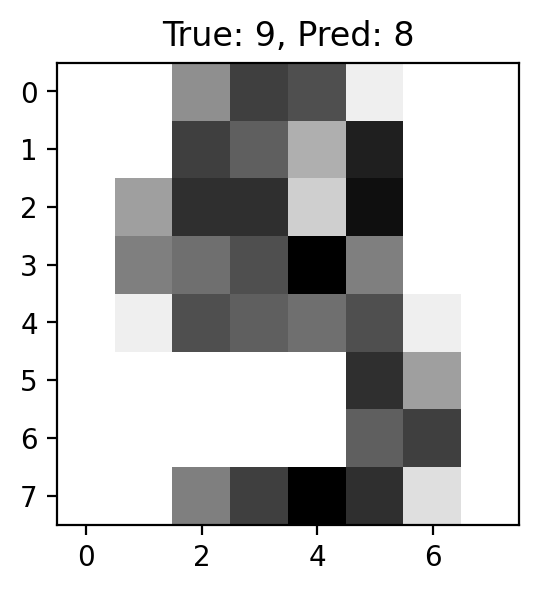

Digit value:	9
Prediction:	8


<Figure size 300x300 with 0 Axes>

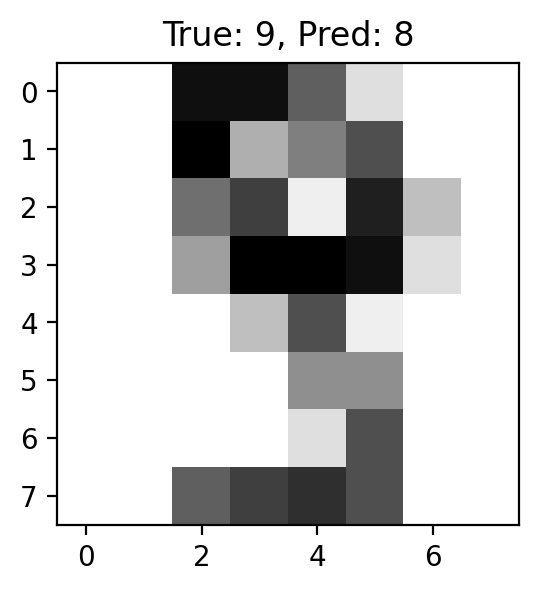

Digit value:	9
Prediction:	1


<Figure size 300x300 with 0 Axes>

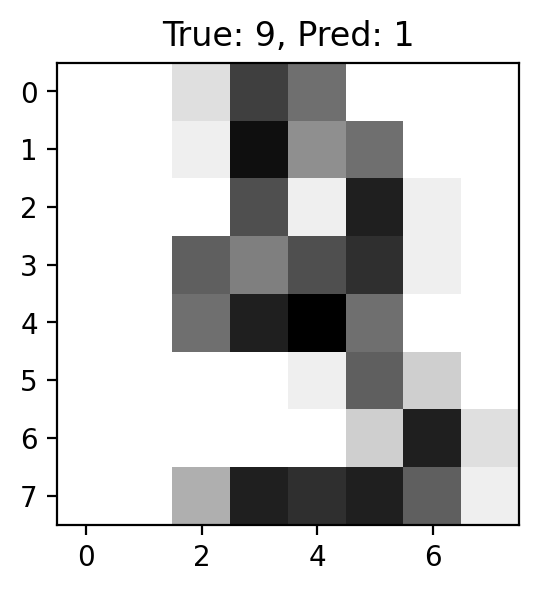

Digit value:	9
Prediction:	8


<Figure size 300x300 with 0 Axes>

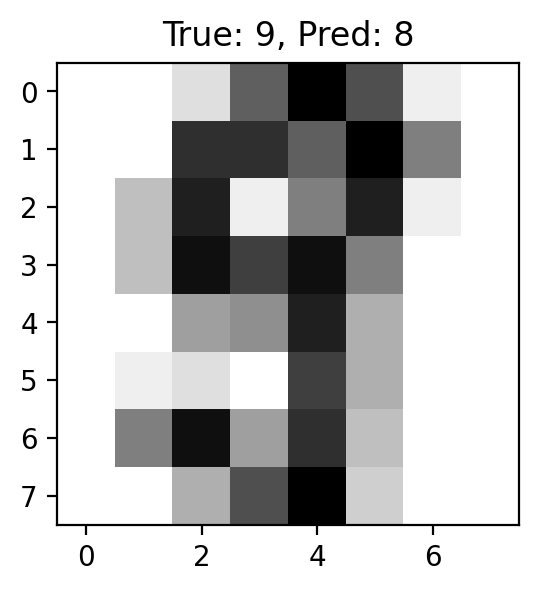

Digit value:	9
Prediction:	7


<Figure size 300x300 with 0 Axes>

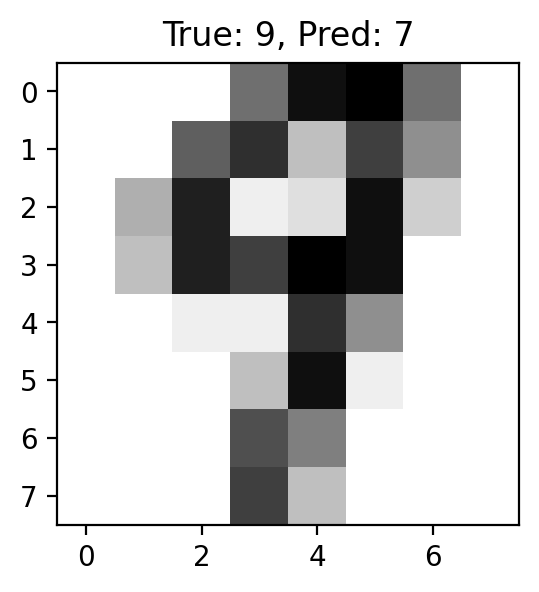

Digit value:	9
Prediction:	4


<Figure size 300x300 with 0 Axes>

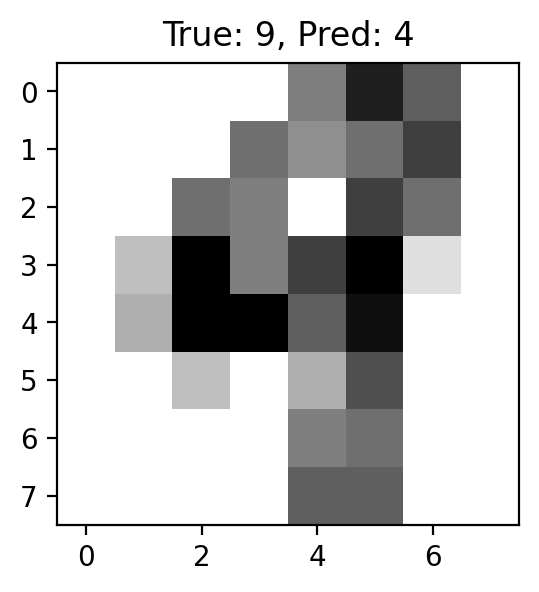

Digit value:	9
Prediction:	4


<Figure size 300x300 with 0 Axes>

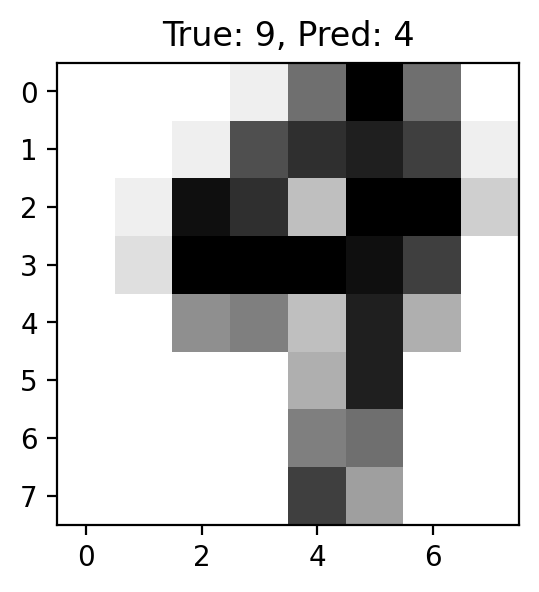

Digit value:	9
Prediction:	7


<Figure size 300x300 with 0 Axes>

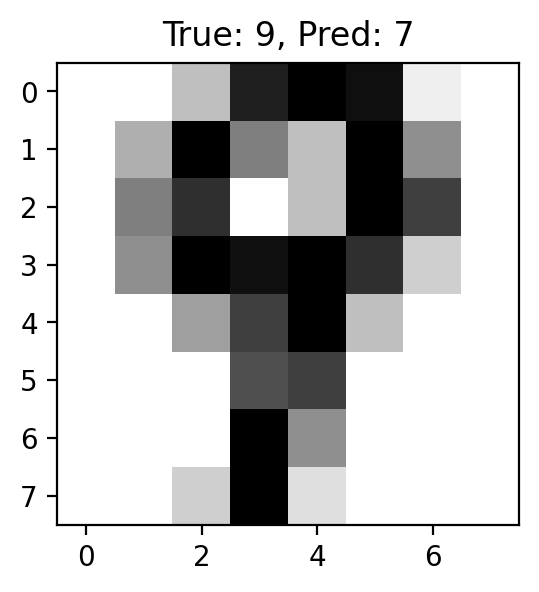

Digit value:	9
Prediction:	4


<Figure size 300x300 with 0 Axes>

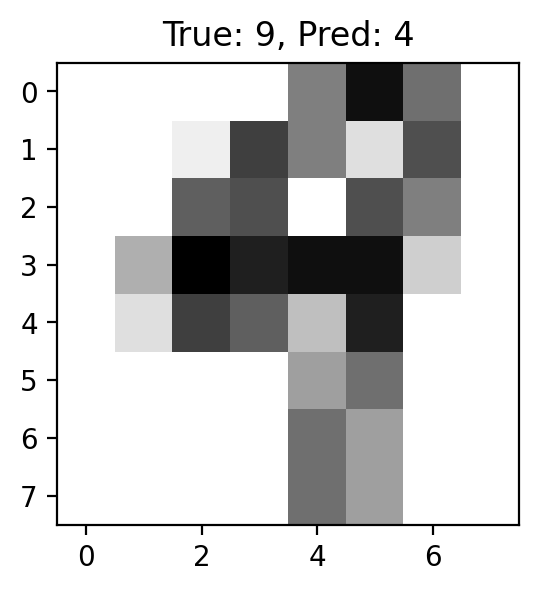

Digit value:	9
Prediction:	8


<Figure size 300x300 with 0 Axes>

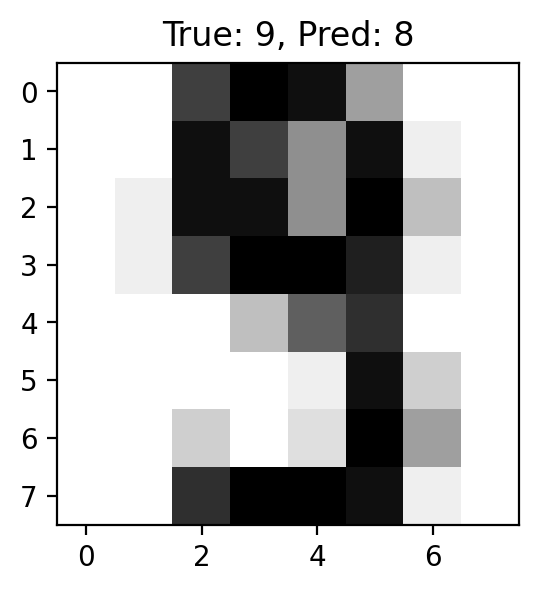

Digit value:	9
Prediction:	8


<Figure size 300x300 with 0 Axes>

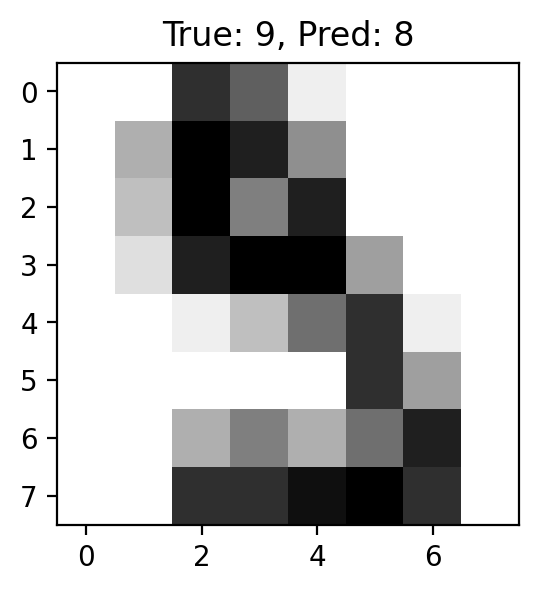

Digit value:	9
Prediction:	8


<Figure size 300x300 with 0 Axes>

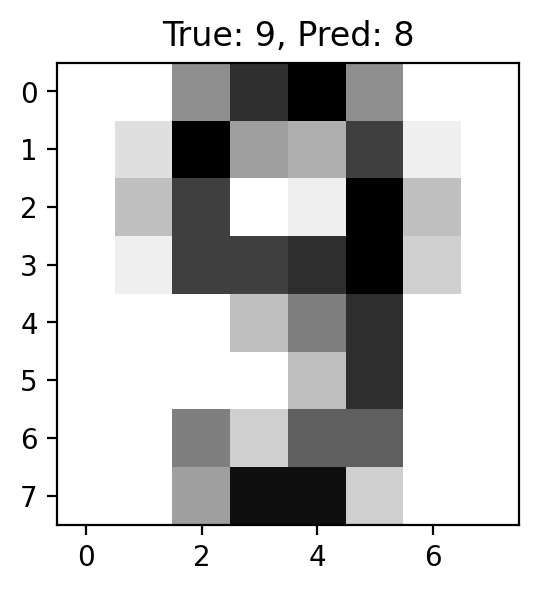

Digit value:	9
Prediction:	7


<Figure size 300x300 with 0 Axes>

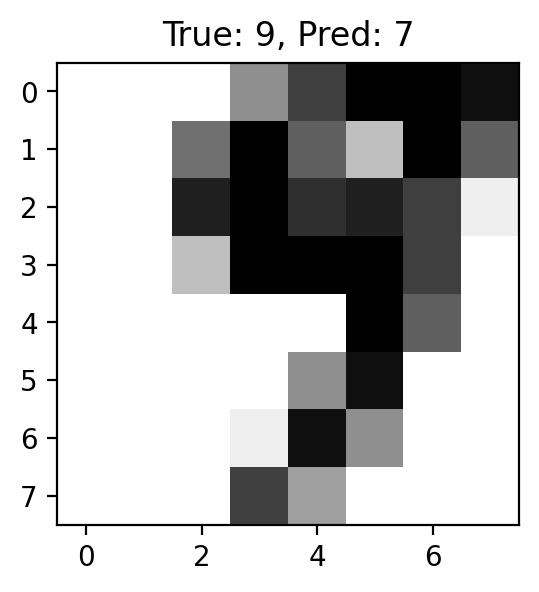

Digit value:	9
Prediction:	7


<Figure size 300x300 with 0 Axes>

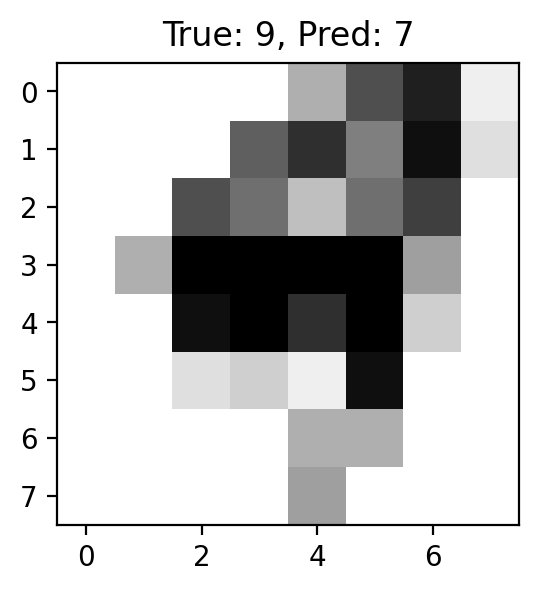

Digit value:	9
Prediction:	3


<Figure size 300x300 with 0 Axes>

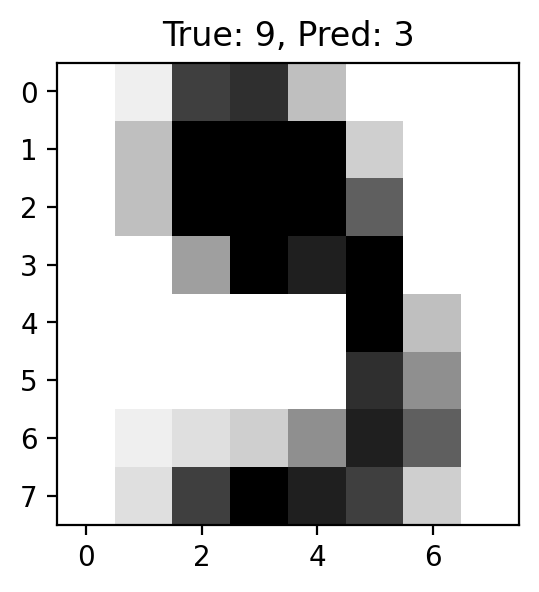

Digit value:	9
Prediction:	8


<Figure size 300x300 with 0 Axes>

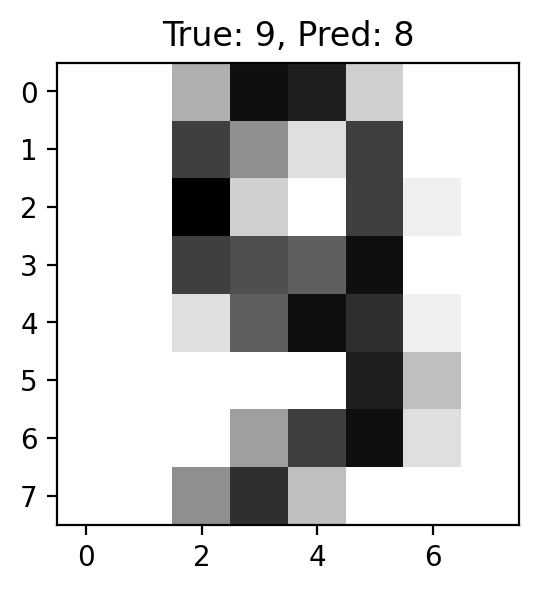

In [144]:
confusing_indices = np.where(y_pred != y_test)
f1_scores = f1_score(y_test, y_pred, average=None)

most_confused_class = np.argmin(f1_scores)

print(f"Most confused class: {most_confused_class}, F1-score: {f1_scores[most_confused_class]:.2f}")

misclassified_indices = np.where((y_pred != y_test) & (y_test == most_confused_class))[0]

for i in misclassified_indices:
    plot_digit(i, X_test, y_test, y_pred)
    

---

### PCA

Try to reduce the number of features through the ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)), by choosing, e.g., the 10 first principal components.

#### PCA and training/evaluation data selection

<span style="color:red">Implement your solution below</span>

In [145]:
# Retrieve the initial dataset
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.25, random_state=21)

[0.152 0.139 0.114 0.084 0.058 0.049 0.043 0.036 0.034 0.031]
[0.152 0.291 0.406 0.489 0.547 0.596 0.639 0.675 0.709 0.74 ]


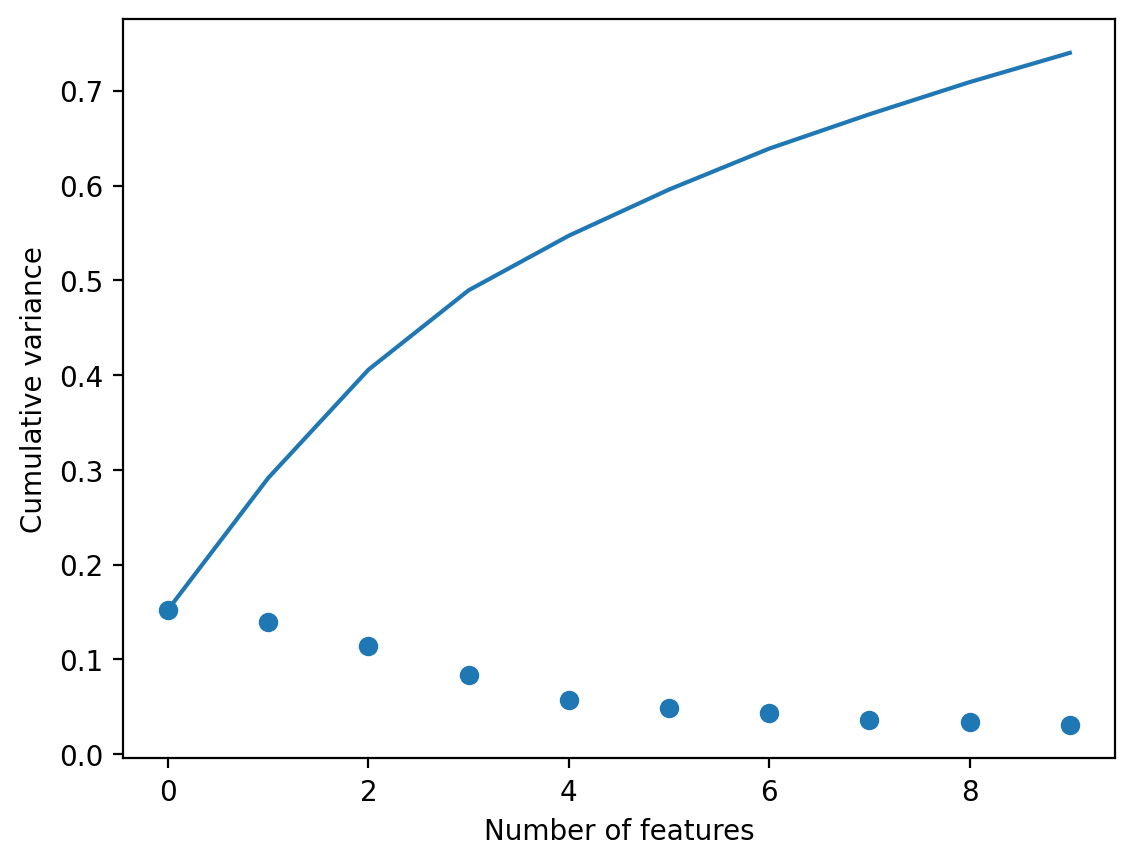

The first five features seem to be the most impactful in determining the nature of the digit.


In [146]:
N_COMP = 10
pca = PCA(n_components=N_COMP)

# Learn the pca model to the training set and apply the model to it
train_pca = pca.fit_transform(X_train)

# Transform the test set with the pca features
test_pca = pca.transform(X_test)

# Display variance ratios and cumulative variance
with np.printoptions(precision=3):
    print(pca.explained_variance_ratio_)
with np.printoptions(precision=3):
    print(pca.explained_variance_ratio_.cumsum()) # cumulative distribution of variance

# Variance analysis
x = list(range(10))
plt.subplot()
plt.scatter(x, pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("Number of features")
plt.ylabel('Cumulative variance')
plt.show()
print("The first five features seem to be the most impactful in determining the nature of the digit.")

#### Model training

<span style="color:red">Implement your solution below</span>

In [147]:
# Model instanciation
model_pca = GaussianNB()

# Learn the model
model_pca.fit(train_pca, y_train )

# Predict on new data
pred_ys_pca = model_pca.predict(test_pca)

#### Evaluation

<span style="color:red">Implement your solution below</span>

In [148]:
print(f"Score: {accuracy_score(y_test, pred_ys_pca):.2f}")
print(f"Classification report:\n{classification_report(y_test, pred_ys_pca)}")
print("The accuracy increased with the reduction in the number of features. \nA much better score was observed for the number 8 (increasing from 55% to 89%).")
print("The model have a better generalization thanks to factorization of features. It is possible that the some of the initial features are irrelevant and increase noise.")

Score: 0.90
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        41
           1       0.79      0.89      0.84        46
           2       0.88      0.92      0.90        39
           3       0.94      0.88      0.91        51
           4       0.97      0.95      0.96        41
           5       0.92      0.90      0.91        52
           6       1.00      0.98      0.99        41
           7       0.89      0.98      0.93        50
           8       0.89      0.79      0.84        53
           9       0.77      0.83      0.80        36

    accuracy                           0.90       450
   macro avg       0.91      0.90      0.90       450
weighted avg       0.91      0.90      0.90       450

The accuracy increased with the reduction in the number of features. 
A much better score was observed for the number 8 (increasing from 55% to 89%).
The model have a better generalization thanks to factori

---

### Cross-Validation

#### Data preparation

Use the function [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to implement cross-validation.

You may choose to do 10 splits (`cv=10`).

Choose as *scoring* `"f1_weighted"`, then the function will return the corresponding scores in an array.

By way of example and in order to be able to compare the results with the previous ones, the first application will be done on the entire dataset (which is usually not recommended).

<span style="color:red">Implement your solution below</span>

In [149]:
SCORINGS = "f1_weighted"
# On the all dataset
cv_scores = cross_val_score(model_pca, data, digits.target, cv=10, scoring=SCORINGS)
print(f"Cross-validation {SCORINGS} scores:", cv_scores)


Cross-validation f1_weighted scores: [0.74643939 0.80864546 0.90456151 0.68155889 0.74197066 0.83962727
 0.86848612 0.86512307 0.82646416 0.81156665]


Show the results with a [`plt.bar`] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) which includes an error bar `yerr` equal to 1 [standard deviation](https://numpy.org/doc/stable/reference/generated/numpy.std.html), as well as in a [`boxplot`](https://matplotlib.org/stable/api/_as_gen/ matplotlib.pyplot.boxplot.html).

<span style="color:red">Implement your solution below</span>

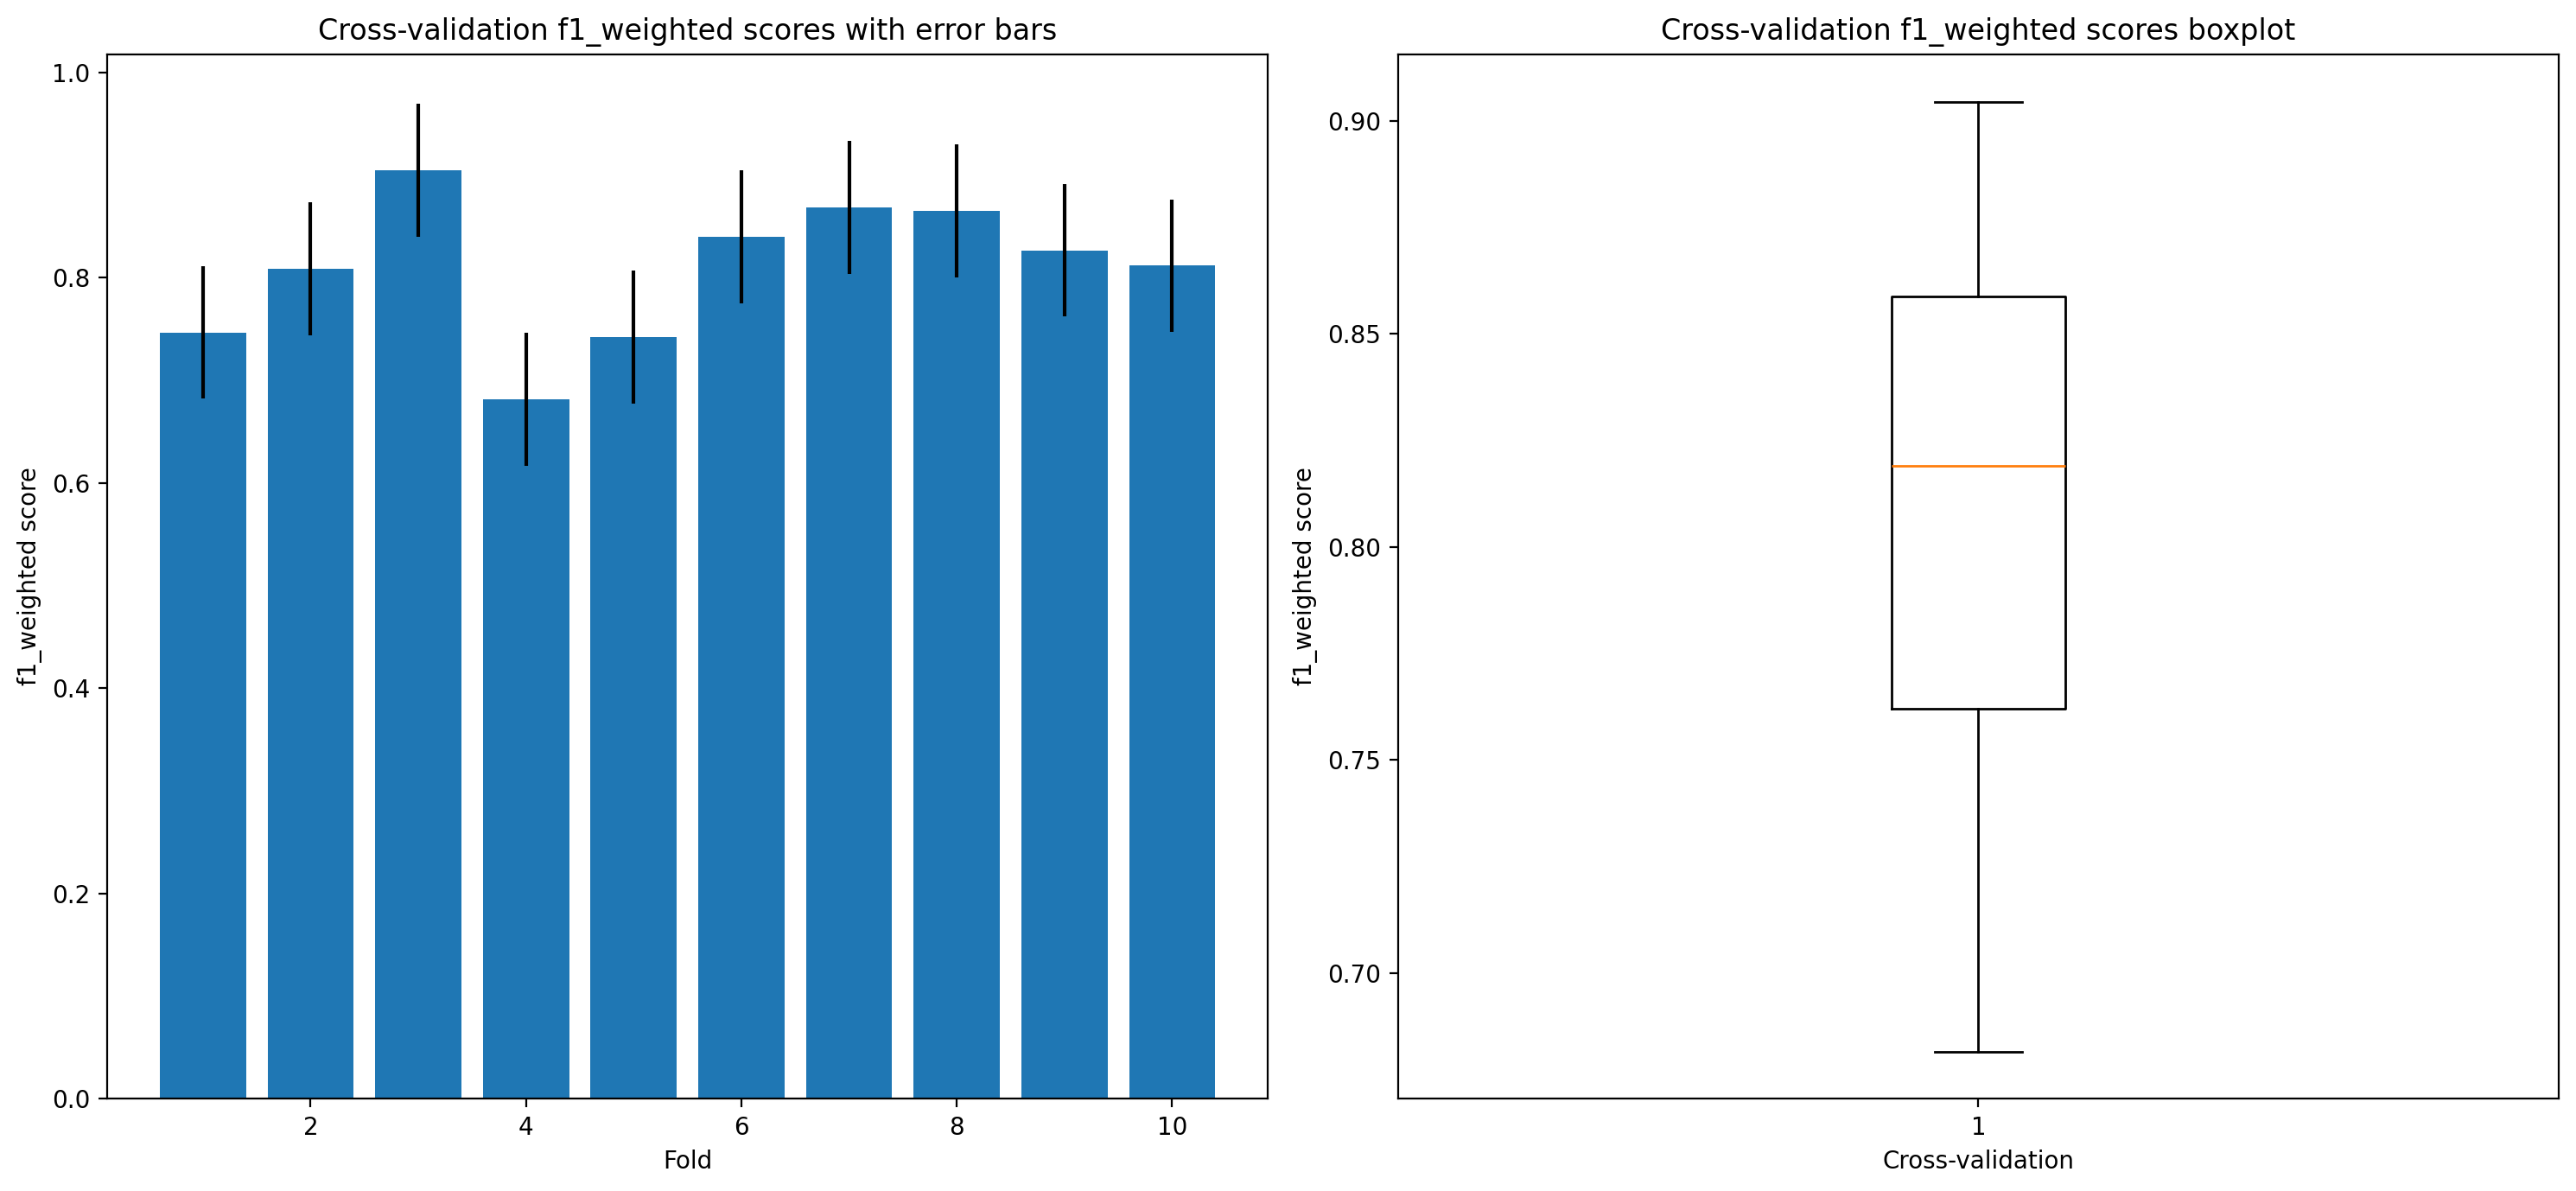

In [150]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(cv_scores) + 1), cv_scores, yerr=np.std(cv_scores))
plt.xlabel("Fold")
plt.ylabel(f"{SCORINGS} score")
plt.title(f"Cross-validation {SCORINGS} scores with error bars")

plt.subplot(1, 2, 2)
plt.boxplot(cv_scores)
plt.xlabel("Cross-validation")
plt.ylabel(f"{SCORINGS} score")
plt.title(f"Cross-validation {SCORINGS} scores boxplot")

plt.tight_layout()
plt.show()

---

### Grid Search

This time, we are going to use cross-validation for one of its primary use: to validate the choice of hyperparameters.

We will use the class
[`model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to choose the best number of main components for the PCA.

This class makes it possible to test several hyperparameters (stored in a dictionary) and to test them via cross-validation (hence the CV in the name).

To do this, we no longer need to worry about creating the different subsets, the `GridSearchCV` class does it for us.

In [151]:
param_grid = {"pca__n_components": [1, 2, 5, 10, 20, 30, 40, 60]}

We're going to use a [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to do PCA compression and training with the model together, which will allow us to modify the hyperparameters at any step of the process through a single command.

We will have to use the exact names of the hyperparameters to modify in the dictionary, preceded by the name of the module and a double *underscore* (e.g., here: `"pca__"`), in order to be able to assign them to the right step of the `pipeline`.

<span style="color:red">Implement your solution below</span>

In [152]:
# Define the pipeline
pipe = Pipeline([
    ("pca", PCA()),
    ("model", GaussianNB())
])


In [153]:
# Define the gridsearch using the pipeline and fit the model

grid = GridSearchCV(pipe, param_grid, cv=7)
grid.fit(X_train, y_train)

,estimator,Pipeline(step...aussianNB())])
,param_grid,"{'pca__n_components': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,7
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_components,40


In [154]:
# Print the best prediction score obtained
# and its corresponding hyperparameter value
print(f"Best prediction score (accuracy metric): {grid.best_score_}") # Try to maximize the accuracy
print(f"Best estimator: {grid.best_estimator_}")
print(f"Associated hyperparameters: {grid.best_params_}")

Best prediction score (accuracy metric): 0.9480361769059956
Best estimator: Pipeline(steps=[('pca', PCA(n_components=40)), ('model', GaussianNB())])
Associated hyperparameters: {'pca__n_components': 40}


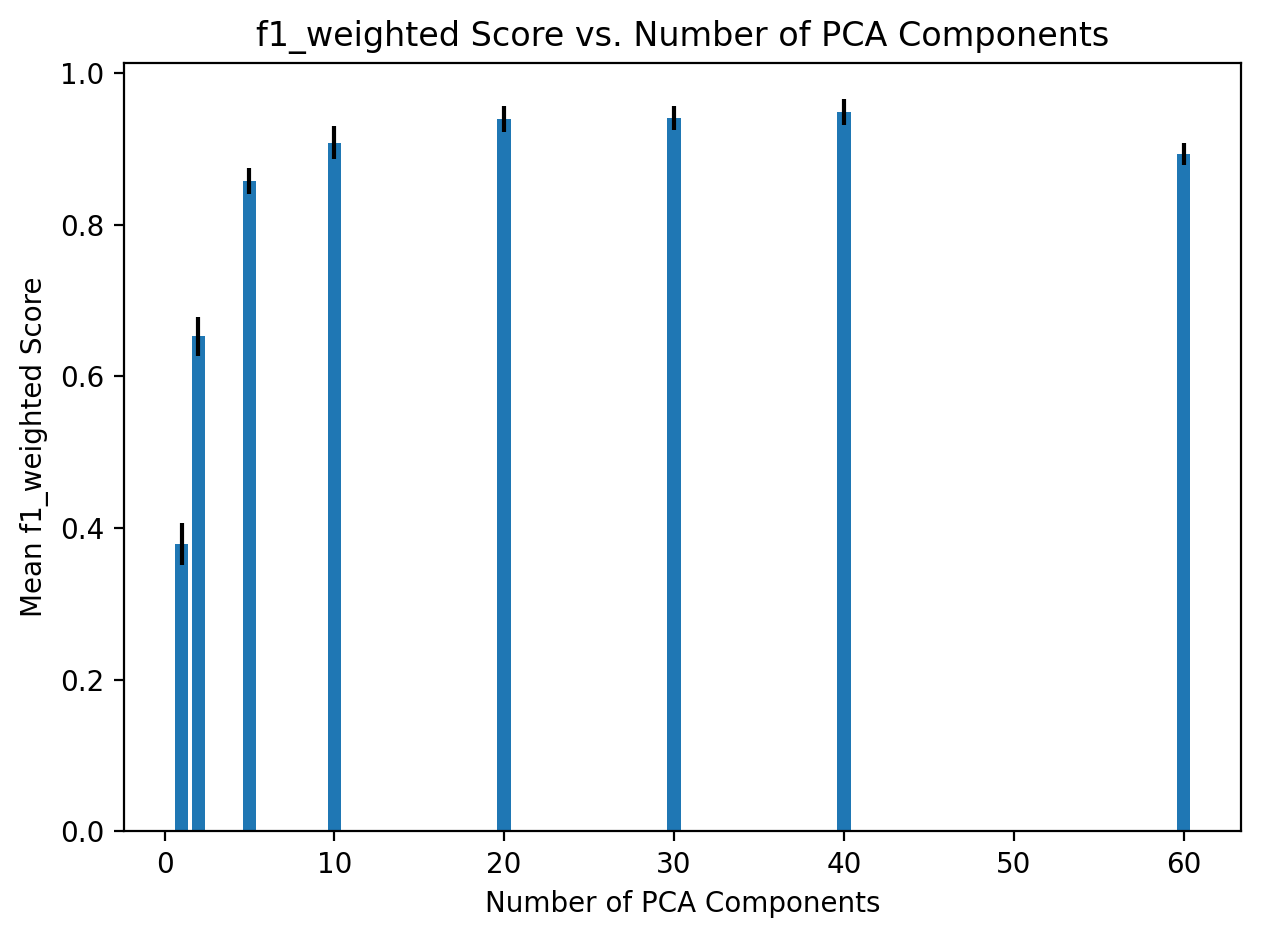

In [155]:
# Plot a bar plot (or boxplot) showing the different prediction scores
# for each tested hyperparameter
# (including the error bars if bar plots are chosen)
plt.subplots()
mean_scores = grid.cv_results_["mean_test_score"]
std_test_scores = grid.cv_results_["std_test_score"]
plt.bar(param_grid["pca__n_components"], mean_scores, yerr=std_test_scores)
plt.xlabel("Number of PCA Components")
plt.ylabel(f"Mean {SCORINGS} Score")
plt.title(f"{SCORINGS} Score vs. Number of PCA Components")
plt.tight_layout()
plt.show()

## Further exercises

Using the `.predict_proba` method of` linear_model.LogisticRegression`, use the result of the prediction to select a particular threshold (*threshold*) to influence the classification performances.

*   Can you get 100% [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)?
*   Can you get 100% of [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)?
*   Measure the values of [f1-scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and comment.
*   Plot the [ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) from multiple threshold values.
*   Compare the [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) (area under the ROC curve) of the `linear_model.LogisticRegression` and of `naive_bayes. GaussianNB()`.

<span style="color:red">Implement your solution below and comment briefly</span>

Accuracy score for default threshold: 0.97
The accuracy is almost 100%. If we choose the optimal threshold, we can have better 
result (if we suppose there are better). This accuracy is already very satisfactory. 
Recall for the default threshold: [1.         0.97826087 0.94871795 1.         0.97560976 0.96153846
 1.         0.96       0.94339623 0.91666667]
Some recall are equal to 100%.
F1-score for the default threshold: [1.         0.95744681 0.97368421 0.96226415 0.96385542 0.97087379
 1.         0.96       0.97087379 0.92957746]
The F1 score depends on the precision and the recall.
Threshold 1.0: No samples classified


/Users/olutolaoloruntobipaul/Desktop/Projects/Hands-on-ML/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


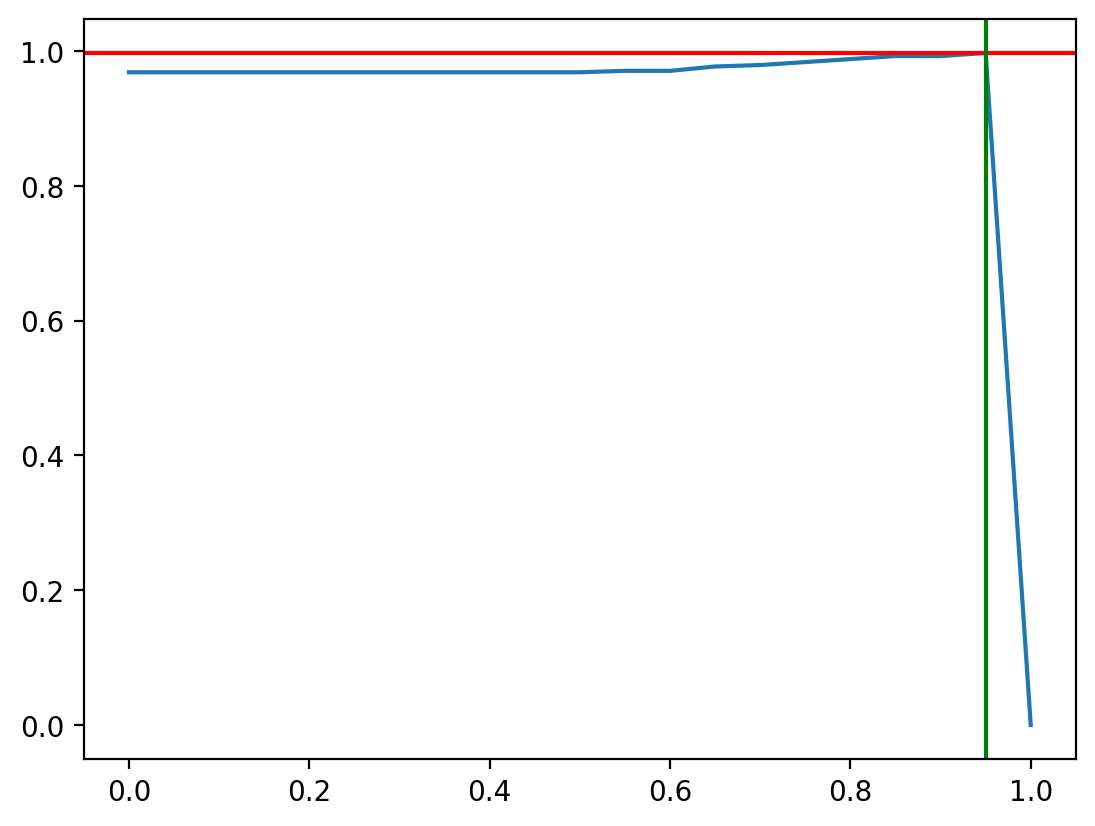

In [156]:
# Create the logistic model
logistic_model = linear_model.LogisticRegression()

# Fit the model
logistic_model.fit(X_train, y_train)

# Predict probabilities
probas = logistic_model.predict_proba(X_test)

# The default threshold of predict is 0.5, let's see the accuracy
y_pred_logistic = logistic_model.predict(X_test)
print(f"Accuracy score for default threshold: {accuracy_score(y_test, y_pred_logistic):.2f}")
print("The accuracy is almost 100%. If we choose the optimal threshold, we can have better \nresult (if we suppose there are better). This accuracy is already very satisfactory. ")

# Print the recall
from sklearn.metrics import recall_score
print(f"Recall for the default threshold: {recall_score(y_test, y_pred_logistic, average=None)}")
print("Some recall are equal to 100%.")

# Print f1-score
from sklearn.metrics import f1_score
print(f"F1-score for the default threshold: {f1_score(y_test, y_pred_logistic, average=None)}")
print("The F1 score depends on the precision and the recall.")

# Test many thresholds
thresholds = np.arange(0, 1.01, 0.05)
accuracies = []
samples = []
for t in thresholds:
    preds = np.array([p.argmax() if p.max() >= t else -1 for p in probas])
    
    # on ne calcule l'accuracy que pour les samples "classifiés"
    mask = preds != -1
    if mask.sum() == 0:
        print(f"Threshold {t}: No samples classified")
        accuracies.append(0)
        continue
    acc = accuracy_score(y_test[mask], preds[mask])
    #print(f"Threshold {t}: Accuracy = {acc:.3f} ({mask.sum()} samples classified)")
    accuracies.append(acc)
    samples.append(mask.sum())

plt.subplots()
plt.plot(thresholds, accuracies)
plt.axhline(y=max(accuracies), color='r')
plt.axvline(x=thresholds[np.argmax(accuracies)], color='g')
plt.show()


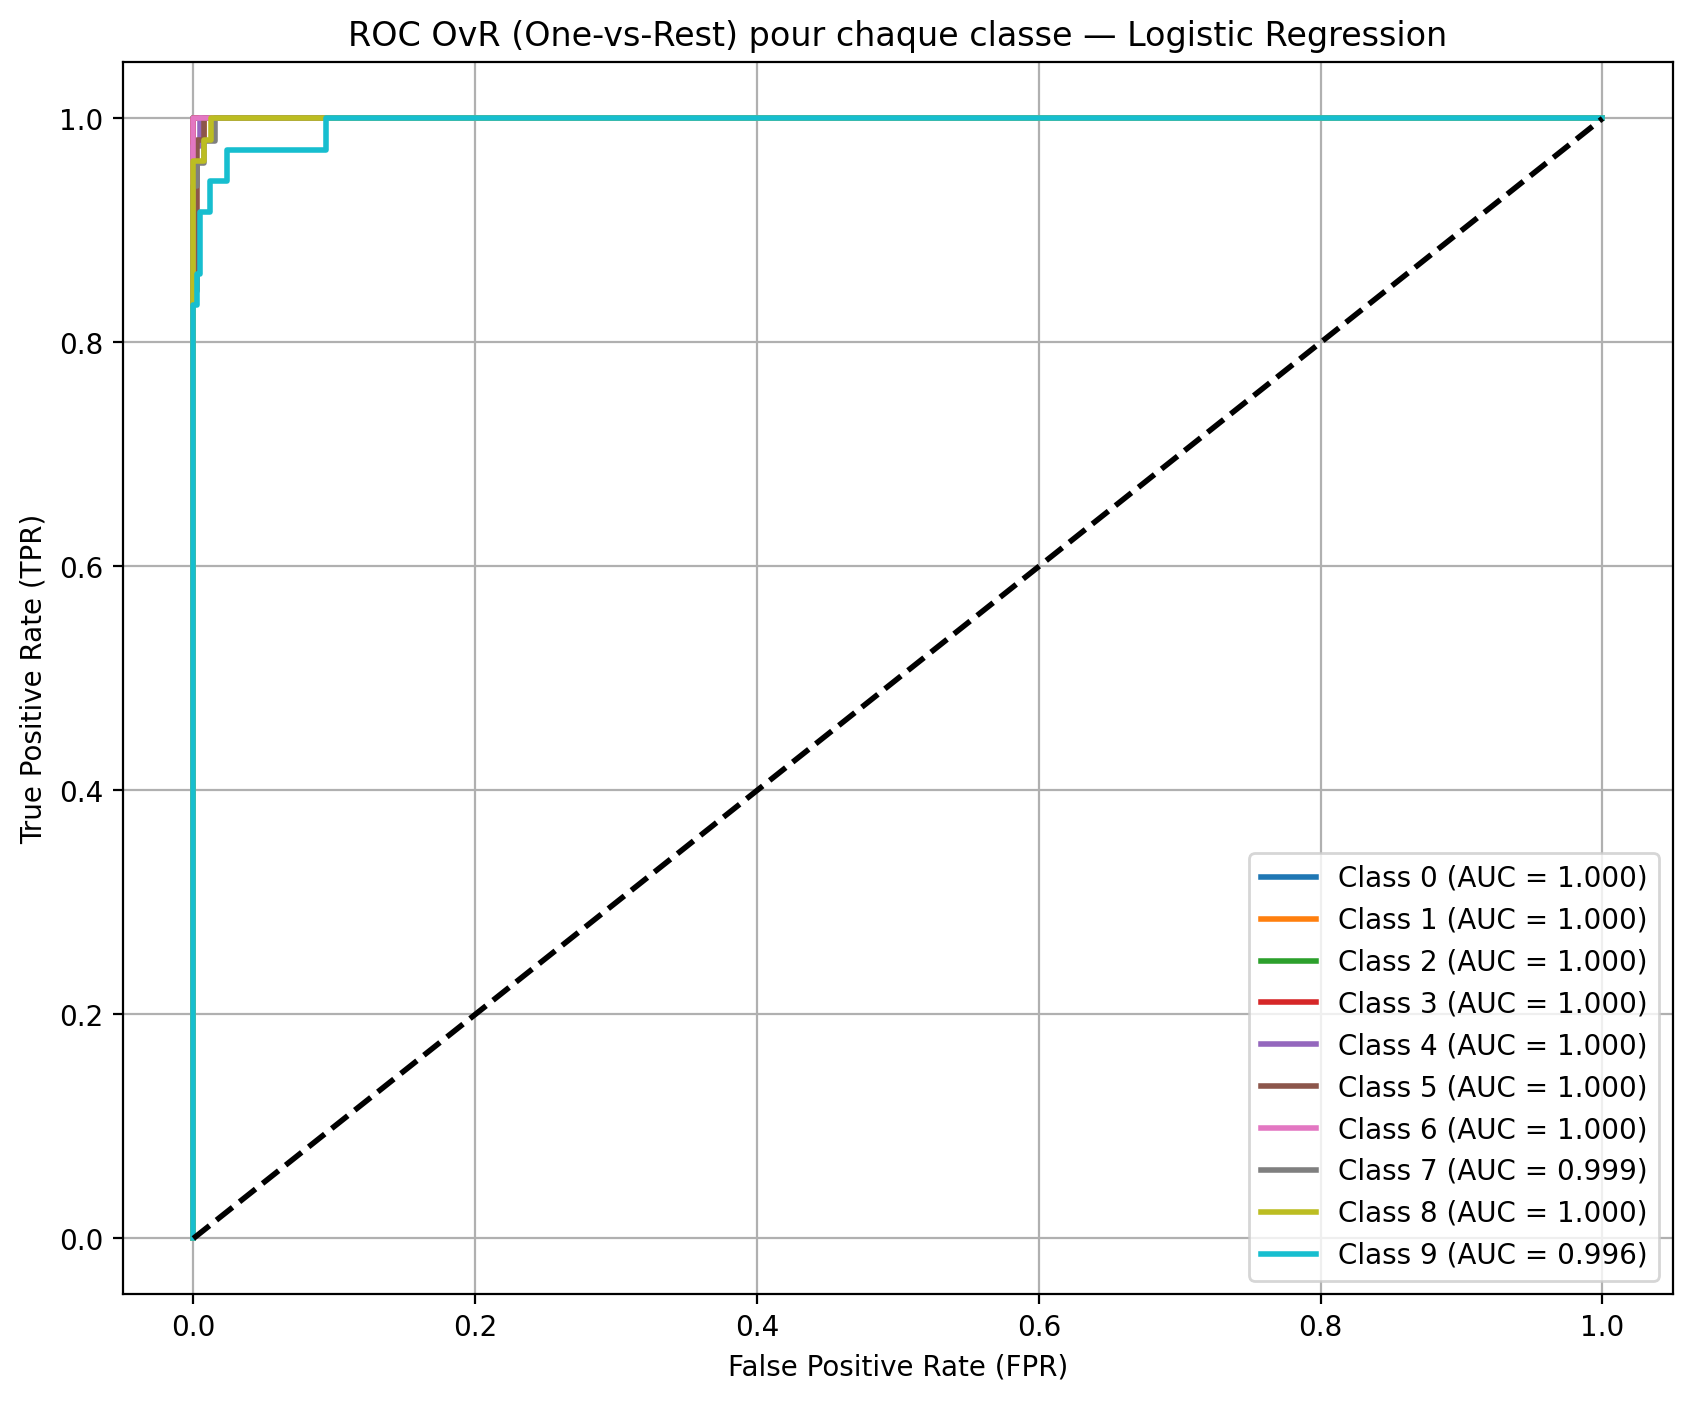

In [157]:
probas = logistic_model.predict_proba(X_test)

plt.figure(figsize=(10, 8))

for class_id in range(10):  # 0 to 9

    # y_true binary : 1 if it is class_id
    y_true_binary = (y_test == class_id).astype(int)

    # Probabilities of this class
    y_score_binary = probas[:, class_id]

    # Compute FPR, TPR for ROC
    fpr, tpr, thresholds = roc_curve(y_true_binary, y_score_binary)

    # Compute AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC for the class
    plt.plot(fpr, tpr, lw=2, label=f"Class {class_id} (AUC = {roc_auc:.3f})")

# Diagonale baseline
plt.plot([0, 1], [0, 1], "k--", lw=2)

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC OvR (One-vs-Rest) pour chaque classe — Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

---